In [ ]:
'''
The steps below have to be done after collection of the data.
Input data requirements: 4 bands l2A SEN2 .tif image, RGB+NIR (Band no. 02, 03, 04, 08)
The maximum size of the input image depends on your hardware. 4000x4000 should work fine.
'''

'''
##### START OF FIRST STEP #####
'''

'''
This script uses trained Convolutional Neural Network (CNN) model to classify satellite images.
Loads model from .h5 file.
Outputs classification map (basename + "_classification.tif") and probability map (basename + "_probabilties.tip").
'''

# Import classification module from the compiled version of SAFIY2 (.so file)
# .so file needs to be located in the current working directory.
import classifying

'''
Arguments for classifying.main()
These arguments will be defined by the users.
Hints are given in the comments for each argument.
Hints should also be given when describing and explaining the exercise.
'''

# Name of the model you want to classify with, should be the same as for training the model.
# Here The provided (pretrained) model is unet. It is the only possible option for the exercise.
MODEL_NAME = "unet"

# Path to the folder with satellite image(s) that will be classified.
INPUT_DIR = "data/01_input"

# The output directory to save results of classification.
# Will create subfolder with name same as model name used for classification.
OUTPUT_DIR = "data/01_output"

# Full path to trained model for field segmentation.
MODEL_PATH = "models/model_Aerial_unet_0_128x128_mrg0_lr0.0001_fs12_bs2000_regDropout_NIR_20190910.h5"

# If True tilling mode will be applied for classification, False no tilling.
# Tilling is useful when the image to be classified is large. In the context of this exercise, images have reasonable size.
TILLING = True

# If tilling is True, size of the tile to split image during the classification, else not used.
TILE_SIZE = [1000, 1000]

# If tilling is True - Size of the overlap between tiles, else not used.
# Size plus margin * 2 have to give total of a number that is dividable by 8, for example size 200, margin 27 = 256.
MARGIN_SIZE = 12

# Number of classes available for segmentation of the image. Must be the same as during the training of the model.
N_CLASSES = 3


'''
Call the main function of classification script, providing arguments defined above.
'''
classifying.main(MODEL_NAME, INPUT_DIR, OUTPUT_DIR, MODEL_PATH, TILLING, TILE_SIZE, MARGIN_SIZE, N_CLASSES)



In [5]:
'''
Output : a classification map, and a probability map. .tif files. Both at pixel level.
These outputs are part of the inputs for the second step.
'''

'''
##### END OF FIRST STEP #####
'''
'''
START OF SECOND STEP
'''

import extract_crop_mask

# Path to crop ground truth mask (shapefile, provided by us in input folders)
INPUT_GT_MASK_PATH = 'data/02_input/Fields2019_INTERSECT_S2A_MSIL2A_20190423T104031_N0211_R008_T32VNH_20190423T133421.shp'

# Path to the reference image that we want to classify.
INPUT_REF_IMG_PATH = "data/01_input/subset_b8_S2A_MSIL2A_20190423T104031_N0211_R008_T32VNH_20190423T133421_merged.tif"

# Output directory.
# Outputs vector mask mask that contains only the crops we are interested to classify. (from INPUT_GT_MASK_PATH)
# Outputs "Interesting_crops.tif"; rasterized version of the mask, and for the region of interest only.
# Creates , "crop_list.pkl" file; list of all the interesting crops contained in the ROI.
OUTPUT_DIR = 'data/02_output'

# Call the main function, providing arguments defined above.
extract_crop_mask.main(INPUT_GT_MASK_PATH, INPUT_REF_IMG_PATH, OUTPUT_DIR)

'''
END OF SECOND STEP
'''

'''
START OF THIRD STEP
'''


Spring barley                                              17894
Permanent grass, standard yield                            14699
Winter wheat                                               12451
Grass with clover/alfalfa, under 50% legumes (rotation)    11374
Winter hybrid rye                                           6322
                                                           ...  
Kentucky bluegrass seed (turfgrass type)                       1
Hops                                                           1
Japanese quince                                                1
Chives                                                         1
Closed system                                                  1
Name: CropNameEn, Length: 244, dtype: int64
2019-11-08 10:08:18-INF[<ipython-input-:       <module>(): 28] 1/26 crops
(1, 'Spring barley')
2019-11-08 10:08:18-INF[<ipython-input-:       <module>(): 28] 2/26 crops
(2, 'Green grain of spring barley')
2019-11-08 10:08:18-INF[<ipython-inp

'\nSTART OF THIRD STEP\n'

In [6]:

import prepare_field_data

# Input directory that contains time series of Sentinel 2 images (provided by us).
INPUT_TS_DIR = "data/03_input"

# Path to output file "Interesting_crops.tif" from step 2.
INPUT_RASTER_MASK_PATH = 'data/02_output/Interesting_crops.tif'

# Path to field detection classification file (.tif), one of the outputs of step 1. The actual classification should be provided and not the probability map.
INPUT_CLASSIF_RASTER_PATH = 'data/01_output/subset_b8_S2A_MSIL2A_20190423T104031_N0211_R008_T32VNH_20190423T133421_merged_model_Aerial_unet_0_128x128_mrg0_lr0_classification.tif'

# Output directory for the labelled image, field features and field ground truth files that will be given to the crop classification model.
OUTPUT_DIR = 'data/03_output'

# Call the main function, providing arguments defined above.
prepare_field_data.main(INPUT_TS_DIR, INPUT_RASTER_MASK_PATH, INPUT_CLASSIF_RASTER_PATH, OUTPUT_DIR)

'''
END OF THIRD STEP
'''


['subset_b8_S2A_MSIL2A_20190629T103031_N0212_R108_T32VNH_20190629T130516_merged.tif'
 'subset_b8_S2A_MSIL2A_20190423T104031_N0211_R008_T32VNH_20190423T133421_merged.tif'
 'subset_b8_S2B_MSIL2A_20190418T104029_N0211_R008_T32VNH_20190418T135653_merged.tif'
 'subset_b8_S2B_MSIL2A_20190329T104029_N0211_R008_T32VNH_20190329T164503_merged.tif']
1000/15007
2000/15007
3000/15007
4000/15007
5000/15007
6000/15007
7000/15007
8000/15007
9000/15007
10000/15007
11000/15007
12000/15007
13000/15007
Class 0: 21.3%
Class 1: 10.32%
Class 2: 0.41%
Class 3: 5.28%
Class 4: 17.98%
Class 5: 1.01%
Class 6: 30.39%
Class 7: 3.92%
Class 8: 6.17%
Class 9: 0.48%
Class 10: 0.94%
Class 11: 0.73%
Class 12: 1.04%
Class 13: 0.04%
2019-11-08 10:25:47-INF[<ipython-input-:       <module>(): 16] Saved outputs to data/03_output


'\nEND OF THIRD STEP\n'

Model 3.h5 already exists, loading weights and retraining with new training dataset
2019-11-08 10:27:17-INF[<ipython-input-:       <module>(): 23] Saved outputs to data/04_output


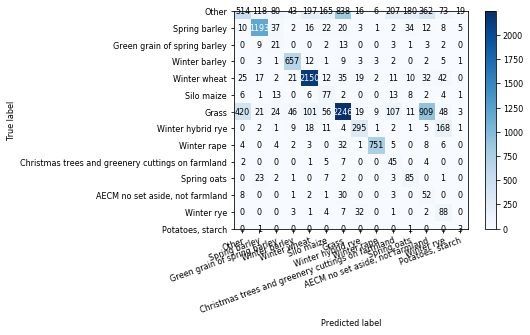

'\nEND OF FOURTH STEP\n'

In [7]:

'''
START OF FOURTH STEP
'''

import analyse_results

# Full path to trained model for crop classification.
CROPS_MODEL_PATH = 'models/3.h5'

# Path to field feature file (ouput of step 4).
INPUT_FIELD_FEATURES_PATH = 'data/03_output/field_features.pkl'

# Path to field labels file (ouput of step 4).
INPUT_FIELD_LABELS_PATH = 'data/03_output/field_labels.pkl'

# Path to crop list file (ouput of step 3).
INPUT_CROP_LIST_PATH = 'data/02_output/crop_list.pkl'

# Output directory for the classification result file.
OUTPUT_FIELD_PREDICTION_DIR = 'data/04_output'

# Call the main function, providing arguments defined above.
analyse_results.main(CROPS_MODEL_PATH, INPUT_FIELD_FEATURES_PATH, INPUT_FIELD_LABELS_PATH, INPUT_CROP_LIST_PATH, OUTPUT_FIELD_PREDICTION_DIR)

'''
END OF FOURTH STEP
'''



In [12]:

'''
START OF FIFTH STEP
'''

import prepare_field_output

# Path to the original image that we have classified.
INPUT_REF_IMG_PATH = 'data/01_input/subset_b8_S2A_MSIL2A_20190423T104031_N0211_R008_T32VNH_20190423T133421_merged.tif'

# Path to output file "Interesting_crops.tif" from step 2.
INPUT_RASTER_MASK_PATH = 'data/02_output/Interesting_crops.tif'

# Path to output "field_predictions.pkl" file from step 4.
INPUT_FIELD_PREDICTION_PATH = 'data/04_output/field_predictions.pkl'

# Path to output labelled image (labelled_im.pkl) from step 3.
INPUT_LABELLED_RASTER_PATH = 'data/03_output/labelled_im.pkl'

# Output directory for the final crop classification image.
OUTPUT_CROP_CLASSIFICATION_DIR = 'data/05_output'

# Call the main function, providing arguments defined above.
prepare_field_output.main(INPUT_REF_IMG_PATH, INPUT_RASTER_MASK_PATH, INPUT_FIELD_PREDICTION_PATH, INPUT_LABELLED_RASTER_PATH, OUTPUT_CROP_CLASSIFICATION_DIR)

'''
END OF FIFTH STEP
'''


1000/15007
2000/15007
3000/15007
4000/15007
5000/15007
6000/15007
7000/15007
8000/15007
9000/15007
10000/15007
11000/15007
12000/15007
13000/15007
2019-11-08 10:28:48-INF[<ipython-input-:       <module>(): 23] Saved result image to data/05_output


'\nEND OF SIXTH STEP\n'